In [2]:
import pandas as pd 

In [4]:
auto = pd.read_csv("C:/Users/DELL/Downloads/Auto.csv")

In [13]:
import pandas as pd
import numpy as np

# Load data and handle missing values
auto = pd.read_csv("Auto.csv", na_values='?').dropna()
auto.reset_index(drop=True, inplace=True)


In [5]:
#a-)
#Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year
#Qualitative: origin, name

In [14]:
quantitative = auto.drop(columns=["name", "origin"])
ranges = pd.DataFrame({
    "Min": quantitative.min(),
    "Max": quantitative.max(),
    "Range": quantitative.max() - quantitative.min()
})
print(ranges)


                 Min     Max   Range
mpg              9.0    46.6    37.6
cylinders        3.0     8.0     5.0
displacement    68.0   455.0   387.0
horsepower      46.0   230.0   184.0
weight        1613.0  5140.0  3527.0
acceleration     8.0    24.8    16.8
year            70.0    82.0    12.0


In [15]:
#c-)
means = quantitative.mean()
stds = quantitative.std()

print("Means:")
print(means)
print("\nStandard Deviations:")
print(stds)


Means:
mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

Standard Deviations:
mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


In [16]:
auto_removed = auto.drop(index=range(9, 85)).reset_index(drop=True)
quant_removed = auto_removed.drop(columns=["name", "origin"])

# Range
range_removed = pd.DataFrame({
    "Min": quant_removed.min(),
    "Max": quant_removed.max(),
    "Range": quant_removed.max() - quant_removed.min()
})

# Mean and Std Dev
stats_removed = pd.DataFrame({
    "Mean": quant_removed.mean(),
    "Std Dev": quant_removed.std()
})

print("Range after removal:")
print(range_removed)
print("\nMean and Std Dev after removal:")
print(stats_removed)


Range after removal:
                 Min     Max   Range
mpg             11.0    46.6    35.6
cylinders        3.0     8.0     5.0
displacement    68.0   455.0   387.0
horsepower      46.0   230.0   184.0
weight        1649.0  4997.0  3348.0
acceleration     8.5    24.8    16.3
year            70.0    82.0    12.0

Mean and Std Dev after removal:
                     Mean     Std Dev
mpg             24.404430    7.867283
cylinders        5.373418    1.654179
displacement   187.240506   99.678367
horsepower     100.721519   35.708853
weight        2935.971519  811.300208
acceleration    15.726899    2.693721
year            77.145570    3.106217


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

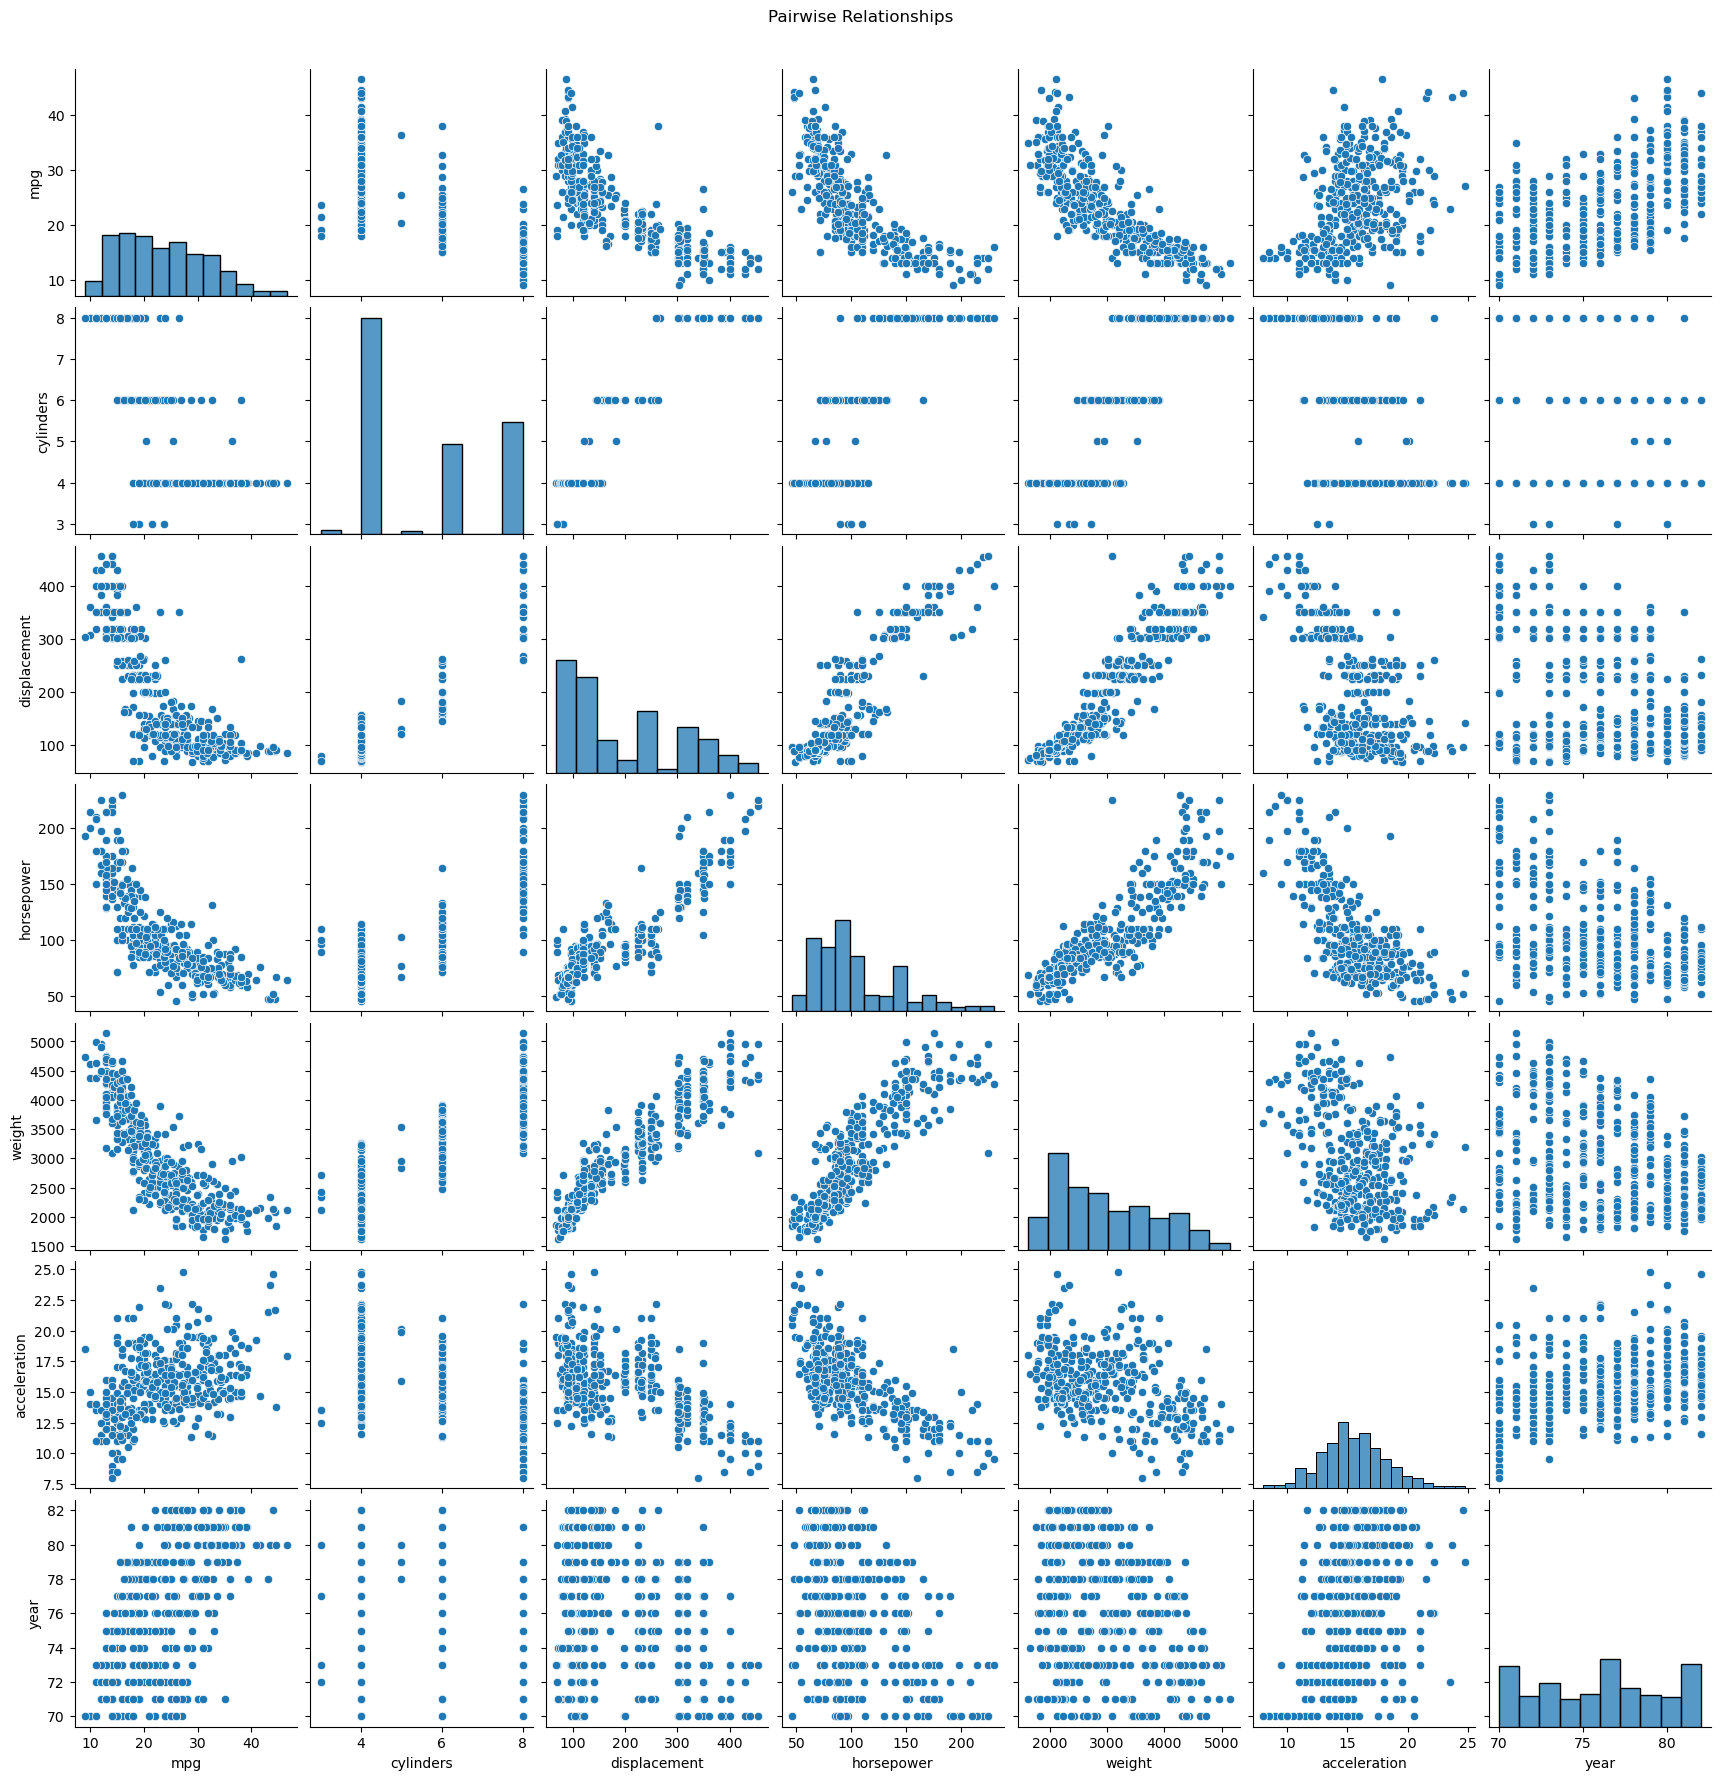

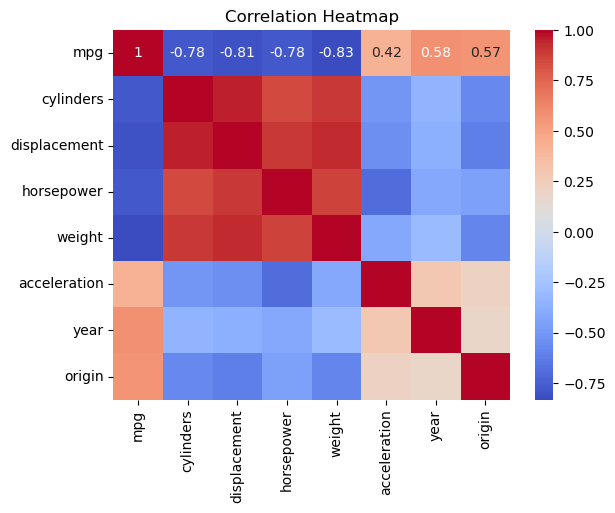

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(auto[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(auto.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


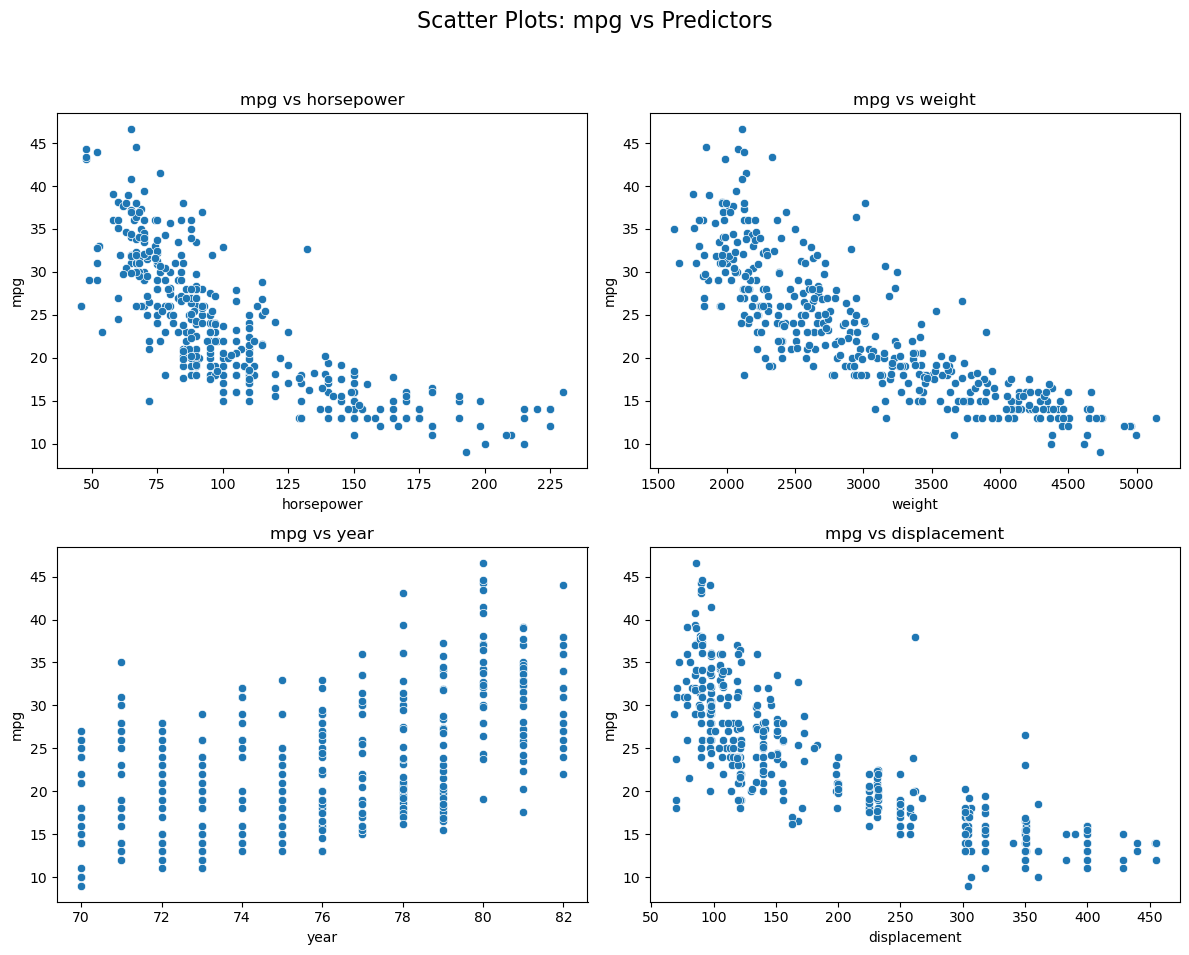

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Scatter Plots: mpg vs Predictors", fontsize=16)

# mpg vs horsepower
sns.scatterplot(x='horsepower', y='mpg', data=auto, ax=axs[0, 0])
axs[0, 0].set_title('mpg vs horsepower')

# mpg vs weight
sns.scatterplot(x='weight', y='mpg', data=auto, ax=axs[0, 1])
axs[0, 1].set_title('mpg vs weight')

# mpg vs year
sns.scatterplot(x='year', y='mpg', data=auto, ax=axs[1, 0])
axs[1, 0].set_title('mpg vs year')

# mpg vs displacement
sns.scatterplot(x='displacement', y='mpg', data=auto, ax=axs[1, 1])
axs[1, 1].set_title('mpg vs displacement')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
